Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


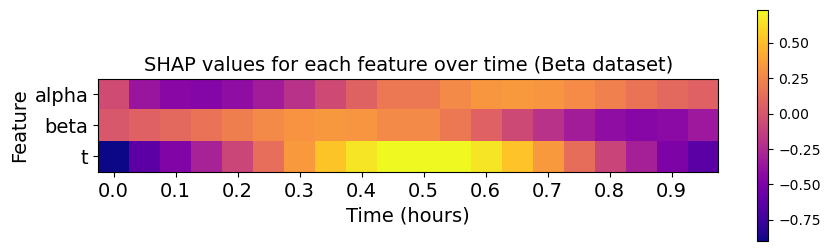

In [1]:
# This script is used to create Figure 11 in the paper
# It requires running Table_3.sh first to generate the results


import sys
sys.path.append('../../')
from experiments.analysis.analysis_utils import create_shap_plot, find_results
import numpy as np

model_name = 'LGBM'
dataset = 'beta_900_20'

results = find_results(dataset, model_name)
if len(results) == 0:
    print(f"No results found for {dataset} and {model_name}")
    print("Make sure you run your experiments from ../run_scripts")
    sys.exit()
elif len(results) > 1:
    print("Multiple results found for the given dataset and model")
    print("We take the last one but it may produce unexpected results")
timestamp = results[-1]

timesteps = np.arange(0, 1, 0.05)
cmap_scale = 0.3
dataset_title ='Beta'
fig = create_shap_plot(model_name, timestamp, dataset, dataset_title, timesteps, cmap_scale=cmap_scale)
fig.savefig(f'figures/Figure_12.pdf', dpi=300, bbox_inches='tight')